# Problem Set 4b - Frozen Lake Problem





In [2]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random



## Load matrices

In [4]:
from scipy.io import loadmat

def load(fname):
    matdict = loadmat(fname)
    
    fl = np.array(matdict["FL"])

    flcost = np.array(matdict["FLCost"])
    return fl, flcost


FL,FL_cost  = load("matrices_4b2.mat")

n = FL_cost.shape[0]

In [5]:
#define directions
up = 0
right = 1
down = 2
left = 3
actions = ["up","right", "down", "left"]

num_actions = 4


# Look at Rewards heatmap

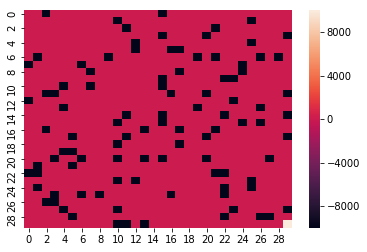

In [6]:
from seaborn import heatmap
heatmap(FL_cost)

# Define helper functions to move around in the grid

In [7]:
def get_next_action(current_state, action): 
    return (np.random.multinomial(1, FL[current_state[0], current_state[1], action, :])).argmax()

def get_next_state(current_state, action):
    if action == left:
        return (current_state[0], max(0, current_state[1]-1))
    if action == right:
        return (current_state[0], min(n-1, current_state[1]+1))
    if action == down:
        return (min(n-1, current_state[0]+1),  current_state[1])
    if action == up:
        return (max(0, current_state[0]-1),  current_state[1])
    
def step(current_state, action):
    next_action = get_next_action(current_state, action)
    next_state = get_next_state(current_state, next_action)
   
    return next_action, next_state


# Implement Q -Learning

In [20]:

#implement Q learning
lr = 0.1 #learning rate
gamma = 1 # discount factor
action_epsilon = 0.90
num_episodes = 5000 #number of iterations

Q = np.random.rand(n, n,num_actions) * 0.001

# print Q

start_state = (0,0)
# current_state = (0,0)
end_state = (n-1,n-1)

scores = []
for i in range(num_episodes):
    start_time = time.time()
    print("Now", i)
    current_state = (0,0)
    j = 0
    score = 0
#     while current_state != end_state:
    while current_state != end_state:
        #get the next action based on some probability 10% take random action, 90% take best action
        action_random_value = random.random()
        if action_random_value < action_epsilon:
            action = np.argmax(Q[current_state[0],current_state[1],:])
        else:
            action = random.randint(0,3)
        
        actual_next_action, next_state = step(current_state, action)
        reward = FL_cost[next_state[0], next_state[1]]
        score += reward
        current_Q = Q[current_state[0],current_state[1], action]
        Q[current_state[0],current_state[1], action] = current_Q +  lr*(reward + gamma * (np.max(Q[next_state[0], next_state[1],:]) - current_Q))
        current_state = next_state
    scores.append(score)    
    print("elapsed time, ", time.time() - start_time)
            
    

Now 0
elapsed time,  0.25824570655822754
Now 1
elapsed time,  0.07555532455444336
Now 2
elapsed time,  0.12068939208984375
Now 3
elapsed time,  0.01866459846496582
Now 4
elapsed time,  0.12490272521972656
Now 5
elapsed time,  0.18416595458984375
Now 6
elapsed time,  0.1352081298828125
Now 7
elapsed time,  0.035205841064453125
Now 8
elapsed time,  0.0551149845123291
Now 9
elapsed time,  0.044373273849487305
Now 10
elapsed time,  0.09479117393493652
Now 11
elapsed time,  0.12183308601379395
Now 12
elapsed time,  0.14584779739379883
Now 13
elapsed time,  0.08021187782287598
Now 14
elapsed time,  0.8969507217407227
Now 15
elapsed time,  0.031250715255737305
Now 16
elapsed time,  0.01562976837158203
Now 17
elapsed time,  0.22917556762695312
Now 18
elapsed time,  0.282764196395874
Now 19
elapsed time,  0.04687929153442383
Now 20
elapsed time,  0.015626907348632812
Now 21
elapsed time,  0.04687976837158203
Now 22
elapsed time,  0.015625715255737305
Now 23
elapsed time,  0.015627384185791016
N

elapsed time,  0.06316733360290527
Now 196
elapsed time,  0.09337592124938965
Now 197
elapsed time,  0.13947296142578125
Now 198
elapsed time,  0.03008103370666504
Now 199
elapsed time,  0.010026931762695312
Now 200
elapsed time,  0.05114102363586426
Now 201
elapsed time,  0.06854939460754395
Now 202
elapsed time,  0.026770591735839844
Now 203
elapsed time,  0.16726326942443848
Now 204
elapsed time,  0.032082557678222656
Now 205
elapsed time,  0.0631718635559082
Now 206
elapsed time,  0.043634891510009766
Now 207
elapsed time,  0.04036545753479004
Now 208
elapsed time,  0.022058486938476562
Now 209
elapsed time,  0.027070999145507812
Now 210
elapsed time,  0.012031793594360352
Now 211
elapsed time,  0.030875444412231445
Now 212
elapsed time,  0.05519843101501465
Now 213
elapsed time,  0.031253814697265625
Now 214
elapsed time,  0.046878814697265625
Now 215
elapsed time,  0.07730650901794434
Now 216
elapsed time,  0.03409290313720703
Now 217
elapsed time,  0.06775283813476562
Now 218
el

elapsed time,  0.06993913650512695
Now 389
elapsed time,  0.017155885696411133
Now 390
elapsed time,  0.03776812553405762
Now 391
elapsed time,  0.09731101989746094
Now 392
elapsed time,  0.09971857070922852
Now 393
elapsed time,  0.022286176681518555
Now 394
elapsed time,  0.06466412544250488
Now 395
elapsed time,  0.04612398147583008
Now 396
elapsed time,  0.02704930305480957
Now 397
elapsed time,  0.013003349304199219
Now 398
elapsed time,  0.02208566665649414
Now 399
elapsed time,  0.11430644989013672
Now 400
elapsed time,  0.03509235382080078
Now 401
elapsed time,  0.17543792724609375
Now 402
elapsed time,  0.031082868576049805
Now 403
elapsed time,  0.03311800956726074
Now 404
elapsed time,  0.035094261169433594
Now 405
elapsed time,  0.06694388389587402
Now 406
elapsed time,  0.04141545295715332
Now 407
elapsed time,  0.024098634719848633
Now 408
elapsed time,  0.021051883697509766
Now 409
elapsed time,  0.019687175750732422
Now 410
elapsed time,  0.10782432556152344
Now 411
ela

elapsed time,  0.09926390647888184
Now 580
elapsed time,  0.048128366470336914
Now 581
elapsed time,  0.023087739944458008
Now 582
elapsed time,  0.0571589469909668
Now 583
elapsed time,  0.008018970489501953
Now 584
elapsed time,  0.2575535774230957
Now 585
elapsed time,  0.03125715255737305
Now 586
elapsed time,  0.06250572204589844
Now 587
elapsed time,  0.09514331817626953
Now 588
elapsed time,  0.0511624813079834
Now 589
elapsed time,  0.07464909553527832
Now 590
elapsed time,  0.03125357627868652
Now 591
elapsed time,  0.015625476837158203
Now 592
elapsed time,  0.015622615814208984
Now 593
elapsed time,  0.03125810623168945
Now 594
elapsed time,  0.06886482238769531
Now 595
elapsed time,  0.038887977600097656
Now 596
elapsed time,  0.03125333786010742
Now 597
elapsed time,  0.04688072204589844
Now 598
elapsed time,  0.0
Now 599
elapsed time,  0.0156252384185791
Now 600
elapsed time,  0.015627384185791016
Now 601
elapsed time,  0.02470088005065918
Now 602
elapsed time,  0.0370941

elapsed time,  0.028416872024536133
Now 778
elapsed time,  0.04725193977355957
Now 779
elapsed time,  0.03128385543823242
Now 780
elapsed time,  0.03125333786010742
Now 781
elapsed time,  0.015627145767211914
Now 782
elapsed time,  0.03125309944152832
Now 783
elapsed time,  0.06163835525512695
Now 784
elapsed time,  0.02506875991821289
Now 785
elapsed time,  0.0170443058013916
Now 786
elapsed time,  0.038822174072265625
Now 787
elapsed time,  0.015636205673217773
Now 788
elapsed time,  0.07811951637268066
Now 789
elapsed time,  0.055126190185546875
Now 790
elapsed time,  0.008021116256713867
Now 791
elapsed time,  0.024227619171142578
Now 792
elapsed time,  0.03148961067199707
Now 793
elapsed time,  0.019081830978393555
Now 794
elapsed time,  0.008021116256713867
Now 795
elapsed time,  0.008389472961425781
Now 796
elapsed time,  0.04690980911254883
Now 797
elapsed time,  0.015597343444824219
Now 798
elapsed time,  0.03128337860107422
Now 799
elapsed time,  0.019381999969482422
Now 800


elapsed time,  0.035594940185546875
Now 971
elapsed time,  0.06670737266540527
Now 972
elapsed time,  0.03125309944152832
Now 973
elapsed time,  0.04688262939453125
Now 974
elapsed time,  0.031250715255737305
Now 975
elapsed time,  0.05964994430541992
Now 976
elapsed time,  0.01908278465270996
Now 977
elapsed time,  0.015039443969726562
Now 978
elapsed time,  0.01528167724609375
Now 979
elapsed time,  0.06253671646118164
Now 980
elapsed time,  0.015626907348632812
Now 981
elapsed time,  0.03125357627868652
Now 982
elapsed time,  0.20159196853637695
Now 983
elapsed time,  0.015629291534423828
Now 984
elapsed time,  0.0156252384185791
Now 985
elapsed time,  0.03125309944152832
Now 986
elapsed time,  0.04687929153442383
Now 987
elapsed time,  0.0
Now 988
elapsed time,  0.015627384185791016
Now 989
elapsed time,  0.031252384185791016
Now 990
elapsed time,  0.03125309944152832
Now 991
elapsed time,  0.05027914047241211
Now 992
elapsed time,  0.016040325164794922
Now 993
elapsed time,  0.002

elapsed time,  0.03954172134399414
Now 1166
elapsed time,  0.015040874481201172
Now 1167
elapsed time,  0.016069650650024414
Now 1168
elapsed time,  0.026072978973388672
Now 1169
elapsed time,  0.03125309944152832
Now 1170
elapsed time,  0.01562952995300293
Now 1171
elapsed time,  0.0
Now 1172
elapsed time,  0.015593528747558594
Now 1173
elapsed time,  0.05534696578979492
Now 1174
elapsed time,  0.03409552574157715
Now 1175
elapsed time,  0.018044710159301758
Now 1176
elapsed time,  0.015038490295410156
Now 1177
elapsed time,  0.046563148498535156
Now 1178
elapsed time,  0.03125643730163574
Now 1179
elapsed time,  0.015626907348632812
Now 1180
elapsed time,  0.0662088394165039
Now 1181
elapsed time,  0.019854068756103516
Now 1182
elapsed time,  0.041136980056762695
Now 1183
elapsed time,  0.01112508773803711
Now 1184
elapsed time,  0.0
Now 1185
elapsed time,  0.04691123962402344
Now 1186
elapsed time,  0.015620708465576172
Now 1187
elapsed time,  0.017909526824951172
Now 1188
elapsed t

elapsed time,  0.03309321403503418
Now 1357
elapsed time,  0.008016109466552734
Now 1358
elapsed time,  0.031165361404418945
Now 1359
elapsed time,  0.10032510757446289
Now 1360
elapsed time,  0.033297061920166016
Now 1361
elapsed time,  0.03901815414428711
Now 1362
elapsed time,  0.04812741279602051
Now 1363
elapsed time,  0.012290239334106445
Now 1364
elapsed time,  0.03291440010070801
Now 1365
elapsed time,  0.04242372512817383
Now 1366
elapsed time,  0.015628337860107422
Now 1367
elapsed time,  0.03125143051147461
Now 1368
elapsed time,  0.041275978088378906
Now 1369
elapsed time,  0.012058734893798828
Now 1370
elapsed time,  0.004012107849121094
Now 1371
elapsed time,  0.0193939208984375
Now 1372
elapsed time,  0.015657424926757812
Now 1373
elapsed time,  0.06250596046447754
Now 1374
elapsed time,  0.015597105026245117
Now 1375
elapsed time,  0.0156557559967041
Now 1376
elapsed time,  0.0
Now 1377
elapsed time,  0.051115989685058594
Now 1378
elapsed time,  0.006016254425048828
Now

elapsed time,  0.026679277420043945
Now 1547
elapsed time,  0.03343987464904785
Now 1548
elapsed time,  0.015659332275390625
Now 1549
elapsed time,  0.031250953674316406
Now 1550
elapsed time,  0.015626907348632812
Now 1551
elapsed time,  0.030271291732788086
Now 1552
elapsed time,  0.020049095153808594
Now 1553
elapsed time,  0.01906275749206543
Now 1554
elapsed time,  0.0
Now 1555
elapsed time,  0.015625715255737305
Now 1556
elapsed time,  0.01563262939453125
Now 1557
elapsed time,  0.03128838539123535
Now 1558
elapsed time,  0.03108358383178711
Now 1559
elapsed time,  0.021058082580566406
Now 1560
elapsed time,  0.002173185348510742
Now 1561
elapsed time,  0.015656709671020508
Now 1562
elapsed time,  0.026988983154296875
Now 1563
elapsed time,  0.024198532104492188
Now 1564
elapsed time,  0.04691052436828613
Now 1565
elapsed time,  0.015599250793457031
Now 1566
elapsed time,  0.034668684005737305
Now 1567
elapsed time,  0.008020401000976562
Now 1568
elapsed time,  0.0440773963928222

elapsed time,  0.024080276489257812
Now 1739
elapsed time,  0.013064384460449219
Now 1740
elapsed time,  0.017016172409057617
Now 1741
elapsed time,  0.013065099716186523
Now 1742
elapsed time,  0.012212753295898438
Now 1743
elapsed time,  0.012028932571411133
Now 1744
elapsed time,  0.01344156265258789
Now 1745
elapsed time,  0.0
Now 1746
elapsed time,  0.015657663345336914
Now 1747
elapsed time,  0.0
Now 1748
elapsed time,  0.015596389770507812
Now 1749
elapsed time,  0.015656232833862305
Now 1750
elapsed time,  0.03125333786010742
Now 1751
elapsed time,  0.0
Now 1752
elapsed time,  0.015602350234985352
Now 1753
elapsed time,  0.015648841857910156
Now 1754
elapsed time,  0.02193307876586914
Now 1755
elapsed time,  0.008020401000976562
Now 1756
elapsed time,  0.008047103881835938
Now 1757
elapsed time,  0.010029315948486328
Now 1758
elapsed time,  0.004007577896118164
Now 1759
elapsed time,  0.028081417083740234
Now 1760
elapsed time,  0.008021354675292969
Now 1761
elapsed time,  0.00

elapsed time,  0.03714394569396973
Now 1935
elapsed time,  0.029078006744384766
Now 1936
elapsed time,  0.013034343719482422
Now 1937
elapsed time,  0.008020639419555664
Now 1938
elapsed time,  0.0070188045501708984
Now 1939
elapsed time,  0.0050127506256103516
Now 1940
elapsed time,  0.0072400569915771484
Now 1941
elapsed time,  0.015656709671020508
Now 1942
elapsed time,  0.0
Now 1943
elapsed time,  0.01559758186340332
Now 1944
elapsed time,  0.015655994415283203
Now 1945
elapsed time,  0.0
Now 1946
elapsed time,  0.015597343444824219
Now 1947
elapsed time,  0.015651226043701172
Now 1948
elapsed time,  0.015626192092895508
Now 1949
elapsed time,  0.015627384185791016
Now 1950
elapsed time,  0.015631675720214844
Now 1951
elapsed time,  0.027803897857666016
Now 1952
elapsed time,  0.010021686553955078
Now 1953
elapsed time,  0.026071786880493164
Now 1954
elapsed time,  0.012028932571411133
Now 1955
elapsed time,  0.012035369873046875
Now 1956
elapsed time,  0.01772332191467285
Now 1957

elapsed time,  0.038450002670288086
Now 2131
elapsed time,  0.03635549545288086
Now 2132
elapsed time,  0.015627384185791016
Now 2133
elapsed time,  0.0
Now 2134
elapsed time,  0.01565718650817871
Now 2135
elapsed time,  0.031252384185791016
Now 2136
elapsed time,  0.015627145767211914
Now 2137
elapsed time,  0.017000675201416016
Now 2138
elapsed time,  0.01566028594970703
Now 2139
elapsed time,  0.031584739685058594
Now 2140
elapsed time,  0.01707172393798828
Now 2141
elapsed time,  0.012035846710205078
Now 2142
elapsed time,  0.013004064559936523
Now 2143
elapsed time,  0.010055065155029297
Now 2144
elapsed time,  0.017045021057128906
Now 2145
elapsed time,  0.013036489486694336
Now 2146
elapsed time,  0.021863460540771484
Now 2147
elapsed time,  0.015625
Now 2148
elapsed time,  0.03125309944152832
Now 2149
elapsed time,  0.015623331069946289
Now 2150
elapsed time,  0.0
Now 2151
elapsed time,  0.015597343444824219
Now 2152
elapsed time,  0.01565718650817871
Now 2153
elapsed time,  0.

elapsed time,  0.04176068305969238
Now 2325
elapsed time,  0.014066696166992188
Now 2326
elapsed time,  0.015039920806884766
Now 2327
elapsed time,  0.018018722534179688
Now 2328
elapsed time,  0.0381319522857666
Now 2329
elapsed time,  0.0451200008392334
Now 2330
elapsed time,  0.005013227462768555
Now 2331
elapsed time,  0.00512242317199707
Now 2332
elapsed time,  0.01565861701965332
Now 2333
elapsed time,  0.015622615814208984
Now 2334
elapsed time,  0.015630006790161133
Now 2335
elapsed time,  0.02077460289001465
Now 2336
elapsed time,  0.011057615280151367
Now 2337
elapsed time,  0.010027647018432617
Now 2338
elapsed time,  0.009023666381835938
Now 2339
elapsed time,  0.007992982864379883
Now 2340
elapsed time,  0.01607489585876465
Now 2341
elapsed time,  0.010024785995483398
Now 2342
elapsed time,  0.002108335494995117
Now 2343
elapsed time,  0.034477949142456055
Now 2344
elapsed time,  0.009006261825561523
Now 2345
elapsed time,  0.011055946350097656
Now 2346
elapsed time,  0.01

elapsed time,  0.015623807907104492
Now 2518
elapsed time,  0.02083444595336914
Now 2519
elapsed time,  0.016072750091552734
Now 2520
elapsed time,  0.016173124313354492
Now 2521
elapsed time,  0.015657901763916016
Now 2522
elapsed time,  0.0
Now 2523
elapsed time,  0.031252384185791016
Now 2524
elapsed time,  0.015627145767211914
Now 2525
elapsed time,  0.0
Now 2526
elapsed time,  0.03125476837158203
Now 2527
elapsed time,  0.015595197677612305
Now 2528
elapsed time,  0.015626907348632812
Now 2529
elapsed time,  0.0
Now 2530
elapsed time,  0.015625953674316406
Now 2531
elapsed time,  0.03174710273742676
Now 2532
elapsed time,  0.009021520614624023
Now 2533
elapsed time,  0.01804947853088379
Now 2534
elapsed time,  0.03336334228515625
Now 2535
elapsed time,  0.015656471252441406
Now 2536
elapsed time,  0.015627145767211914
Now 2537
elapsed time,  0.01562643051147461
Now 2538
elapsed time,  0.015627384185791016
Now 2539
elapsed time,  0.031222105026245117
Now 2540
elapsed time,  0.01562

Now 2722
elapsed time,  0.026728391647338867
Now 2723
elapsed time,  0.009055376052856445
Now 2724
elapsed time,  0.007014751434326172
Now 2725
elapsed time,  0.016373395919799805
Now 2726
elapsed time,  0.0
Now 2727
elapsed time,  0.015631437301635742
Now 2728
elapsed time,  0.015651702880859375
Now 2729
elapsed time,  0.015627384185791016
Now 2730
elapsed time,  0.015627145767211914
Now 2731
elapsed time,  0.015628576278686523
Now 2732
elapsed time,  0.015624046325683594
Now 2733
elapsed time,  0.023834705352783203
Now 2734
elapsed time,  0.014037132263183594
Now 2735
elapsed time,  0.007009029388427734
Now 2736
elapsed time,  0.017025232315063477
Now 2737
elapsed time,  0.012058019638061523
Now 2738
elapsed time,  0.006991386413574219
Now 2739
elapsed time,  0.011029243469238281
Now 2740
elapsed time,  0.020082950592041016
Now 2741
elapsed time,  0.008020401000976562
Now 2742
elapsed time,  0.014037609100341797
Now 2743
elapsed time,  0.00802302360534668
Now 2744
elapsed time,  0.01

elapsed time,  0.03631472587585449
Now 2918
elapsed time,  0.020082712173461914
Now 2919
elapsed time,  0.027228593826293945
Now 2920
elapsed time,  0.03128337860107422
Now 2921
elapsed time,  0.03125619888305664
Now 2922
elapsed time,  0.015623807907104492
Now 2923
elapsed time,  0.015626192092895508
Now 2924
elapsed time,  0.0
Now 2925
elapsed time,  0.046881914138793945
Now 2926
elapsed time,  0.015625
Now 2927
elapsed time,  0.016924142837524414
Now 2928
elapsed time,  0.03208732604980469
Now 2929
elapsed time,  0.007022857666015625
Now 2930
elapsed time,  0.005129098892211914
Now 2931
elapsed time,  0.015656709671020508
Now 2932
elapsed time,  0.01562666893005371
Now 2933
elapsed time,  0.03125405311584473
Now 2934
elapsed time,  0.0
Now 2935
elapsed time,  0.019822359085083008
Now 2936
elapsed time,  0.018210172653198242
Now 2937
elapsed time,  0.03128361701965332
Now 2938
elapsed time,  0.037160634994506836
Now 2939
elapsed time,  0.011028289794921875
Now 2940
elapsed time,  0.0

elapsed time,  0.026907682418823242
Now 3112
elapsed time,  0.007032155990600586
Now 3113
elapsed time,  0.021073341369628906
Now 3114
elapsed time,  0.009023666381835938
Now 3115
elapsed time,  0.012030363082885742
Now 3116
elapsed time,  0.014008522033691406
Now 3117
elapsed time,  0.01807403564453125
Now 3118
elapsed time,  0.010025978088378906
Now 3119
elapsed time,  0.013038396835327148
Now 3120
elapsed time,  0.014008760452270508
Now 3121
elapsed time,  0.010051250457763672
Now 3122
elapsed time,  0.0042417049407958984
Now 3123
elapsed time,  0.015657663345336914
Now 3124
elapsed time,  0.029913663864135742
Now 3125
elapsed time,  0.004983186721801758
Now 3126
elapsed time,  0.008049249649047852
Now 3127
elapsed time,  0.008996009826660156
Now 3128
elapsed time,  0.0060155391693115234
Now 3129
elapsed time,  0.02409219741821289
Now 3130
elapsed time,  0.017046689987182617
Now 3131
elapsed time,  0.005013942718505859
Now 3132
elapsed time,  0.0070154666900634766
Now 3133
elapsed t

elapsed time,  0.02398395538330078
Now 3319
elapsed time,  0.00802159309387207
Now 3320
elapsed time,  0.013029813766479492
Now 3321
elapsed time,  0.013039112091064453
Now 3322
elapsed time,  0.012031316757202148
Now 3323
elapsed time,  0.0021390914916992188
Now 3324
elapsed time,  0.015656471252441406
Now 3325
elapsed time,  0.0
Now 3326
elapsed time,  0.01562643051147461
Now 3327
elapsed time,  0.0
Now 3328
elapsed time,  0.03124856948852539
Now 3329
elapsed time,  0.015628337860107422
Now 3330
elapsed time,  0.015625
Now 3331
elapsed time,  0.01562666893005371
Now 3332
elapsed time,  0.01562666893005371
Now 3333
elapsed time,  0.0
Now 3334
elapsed time,  0.015632152557373047
Now 3335
elapsed time,  0.0
Now 3336
elapsed time,  0.024889469146728516
Now 3337
elapsed time,  0.011055946350097656
Now 3338
elapsed time,  0.012030601501464844
Now 3339
elapsed time,  0.006992340087890625
Now 3340
elapsed time,  0.008052349090576172
Now 3341
elapsed time,  0.005985260009765625
Now 3342
elaps

elapsed time,  0.020898103713989258
Now 3527
elapsed time,  0.010026931762695312
Now 3528
elapsed time,  0.025098562240600586
Now 3529
elapsed time,  0.0060138702392578125
Now 3530
elapsed time,  0.007170677185058594
Now 3531
elapsed time,  0.0
Now 3532
elapsed time,  0.015627622604370117
Now 3533
elapsed time,  0.015657663345336914
Now 3534
elapsed time,  0.015630245208740234
Now 3535
elapsed time,  0.015622138977050781
Now 3536
elapsed time,  0.015626192092895508
Now 3537
elapsed time,  0.015627384185791016
Now 3538
elapsed time,  0.015625953674316406
Now 3539
elapsed time,  0.01562356948852539
Now 3540
elapsed time,  0.01562976837158203
Now 3541
elapsed time,  0.019617080688476562
Now 3542
elapsed time,  0.009055376052856445
Now 3543
elapsed time,  0.03509020805358887
Now 3544
elapsed time,  0.017048358917236328
Now 3545
elapsed time,  0.004342555999755859
Now 3546
elapsed time,  0.015654325485229492
Now 3547
elapsed time,  0.0
Now 3548
elapsed time,  0.015628814697265625
Now 3549
e

elapsed time,  0.04601907730102539
Now 3730
elapsed time,  0.025065183639526367
Now 3731
elapsed time,  0.014006853103637695
Now 3732
elapsed time,  0.017075777053833008
Now 3733
elapsed time,  0.008022069931030273
Now 3734
elapsed time,  0.01102590560913086
Now 3735
elapsed time,  0.01973891258239746
Now 3736
elapsed time,  0.04687952995300293
Now 3737
elapsed time,  0.015627145767211914
Now 3738
elapsed time,  0.0
Now 3739
elapsed time,  0.015625953674316406
Now 3740
elapsed time,  0.015629053115844727
Now 3741
elapsed time,  0.02606058120727539
Now 3742
elapsed time,  0.01707291603088379
Now 3743
elapsed time,  0.03043818473815918
Now 3744
elapsed time,  0.015659332275390625
Now 3745
elapsed time,  0.0
Now 3746
elapsed time,  0.0
Now 3747
elapsed time,  0.015594720840454102
Now 3748
elapsed time,  0.01562643051147461
Now 3749
elapsed time,  0.01565718650817871
Now 3750
elapsed time,  0.0
Now 3751
elapsed time,  0.03125357627868652
Now 3752
elapsed time,  0.0
Now 3753
elapsed time,  

elapsed time,  0.02105879783630371
Now 3927
elapsed time,  0.007016420364379883
Now 3928
elapsed time,  0.012032270431518555
Now 3929
elapsed time,  0.0050122737884521484
Now 3930
elapsed time,  0.006014108657836914
Now 3931
elapsed time,  0.010030984878540039
Now 3932
elapsed time,  0.012027978897094727
Now 3933
elapsed time,  0.03707003593444824
Now 3934
elapsed time,  0.0060160160064697266
Now 3935
elapsed time,  0.00804591178894043
Now 3936
elapsed time,  0.03008580207824707
Now 3937
elapsed time,  0.014037370681762695
Now 3938
elapsed time,  0.017734766006469727
Now 3939
elapsed time,  0.016050338745117188
Now 3940
elapsed time,  0.008020401000976562
Now 3941
elapsed time,  0.015038490295410156
Now 3942
elapsed time,  0.012004375457763672
Now 3943
elapsed time,  0.0060160160064697266
Now 3944
elapsed time,  0.019076108932495117
Now 3945
elapsed time,  0.0050127506256103516
Now 3946
elapsed time,  0.014039039611816406
Now 3947
elapsed time,  0.00802159309387207
Now 3948
elapsed tim

elapsed time,  0.019150495529174805
Now 4138
elapsed time,  0.014039039611816406
Now 4139
elapsed time,  0.0254366397857666
Now 4140
elapsed time,  0.0
Now 4141
elapsed time,  0.031279563903808594
Now 4142
elapsed time,  0.0
Now 4143
elapsed time,  0.015626192092895508
Now 4144
elapsed time,  0.023877859115600586
Now 4145
elapsed time,  0.011034250259399414
Now 4146
elapsed time,  0.0060122013092041016
Now 4147
elapsed time,  0.03007960319519043
Now 4148
elapsed time,  0.02707672119140625
Now 4149
elapsed time,  0.009023427963256836
Now 4150
elapsed time,  0.021056175231933594
Now 4151
elapsed time,  0.010998964309692383
Now 4152
elapsed time,  0.018074750900268555
Now 4153
elapsed time,  0.016015052795410156
Now 4154
elapsed time,  0.012032747268676758
Now 4155
elapsed time,  0.00805044174194336
Now 4156
elapsed time,  0.0243222713470459
Now 4157
elapsed time,  0.0
Now 4158
elapsed time,  0.0
Now 4159
elapsed time,  0.015602827072143555
Now 4160
elapsed time,  0.015651702880859375
Now

elapsed time,  0.01798534393310547
Now 4353
elapsed time,  0.007048368453979492
Now 4354
elapsed time,  0.008994817733764648
Now 4355
elapsed time,  0.005038738250732422
Now 4356
elapsed time,  0.004037380218505859
Now 4357
elapsed time,  0.016042232513427734
Now 4358
elapsed time,  0.0030074119567871094
Now 4359
elapsed time,  0.010210752487182617
Now 4360
elapsed time,  0.0
Now 4361
elapsed time,  0.01562809944152832
Now 4362
elapsed time,  0.015625953674316406
Now 4363
elapsed time,  0.0
Now 4364
elapsed time,  0.015656471252441406
Now 4365
elapsed time,  0.0
Now 4366
elapsed time,  0.015596389770507812
Now 4367
elapsed time,  0.015656709671020508
Now 4368
elapsed time,  0.0
Now 4369
elapsed time,  0.0
Now 4370
elapsed time,  0.017911195755004883
Now 4371
elapsed time,  0.0
Now 4372
elapsed time,  0.0
Now 4373
elapsed time,  0.01562809944152832
Now 4374
elapsed time,  0.0
Now 4375
elapsed time,  0.015656232833862305
Now 4376
elapsed time,  0.0
Now 4377
elapsed time,  0.0155968666076

elapsed time,  0.023705482482910156
Now 4572
elapsed time,  0.00898432731628418
Now 4573
elapsed time,  0.009048223495483398
Now 4574
elapsed time,  0.008023500442504883
Now 4575
elapsed time,  0.007018327713012695
Now 4576
elapsed time,  0.007017612457275391
Now 4577
elapsed time,  0.0059854984283447266
Now 4578
elapsed time,  0.0031337738037109375
Now 4579
elapsed time,  0.015657663345336914
Now 4580
elapsed time,  0.03125429153442383
Now 4581
elapsed time,  0.0
Now 4582
elapsed time,  0.015624523162841797
Now 4583
elapsed time,  0.0
Now 4584
elapsed time,  0.01562786102294922
Now 4585
elapsed time,  0.015596151351928711
Now 4586
elapsed time,  0.015655994415283203
Now 4587
elapsed time,  0.0
Now 4588
elapsed time,  0.015624284744262695
Now 4589
elapsed time,  0.0
Now 4590
elapsed time,  0.01562976837158203
Now 4591
elapsed time,  0.0
Now 4592
elapsed time,  0.0
Now 4593
elapsed time,  0.024773836135864258
Now 4594
elapsed time,  0.010009765625
Now 4595
elapsed time,  0.0180208683013

elapsed time,  0.0212552547454834
Now 4776
elapsed time,  0.012027978897094727
Now 4777
elapsed time,  0.007993936538696289
Now 4778
elapsed time,  0.017072439193725586
Now 4779
elapsed time,  0.007018566131591797
Now 4780
elapsed time,  0.01203608512878418
Now 4781
elapsed time,  0.00701904296875
Now 4782
elapsed time,  0.009016275405883789
Now 4783
elapsed time,  0.0180509090423584
Now 4784
elapsed time,  0.01804828643798828
Now 4785
elapsed time,  0.02105998992919922
Now 4786
elapsed time,  0.011025190353393555
Now 4787
elapsed time,  0.0070192813873291016
Now 4788
elapsed time,  0.002299070358276367
Now 4789
elapsed time,  0.0
Now 4790
elapsed time,  0.030831336975097656
Now 4791
elapsed time,  0.011029481887817383
Now 4792
elapsed time,  0.012031793594360352
Now 4793
elapsed time,  0.009031534194946289
Now 4794
elapsed time,  0.004982471466064453
Now 4795
elapsed time,  0.012063264846801758
Now 4796
elapsed time,  0.015035390853881836
Now 4797
elapsed time,  0.010026693344116211
N

elapsed time,  0.03182530403137207
Now 4971
elapsed time,  0.013066768646240234
Now 4972
elapsed time,  0.012026786804199219
Now 4973
elapsed time,  0.013037443161010742
Now 4974
elapsed time,  0.0024476051330566406
Now 4975
elapsed time,  0.0
Now 4976
elapsed time,  0.01565694808959961
Now 4977
elapsed time,  0.015627384185791016
Now 4978
elapsed time,  0.0
Now 4979
elapsed time,  0.031252384185791016
Now 4980
elapsed time,  0.015626907348632812
Now 4981
elapsed time,  0.0
Now 4982
elapsed time,  0.015596866607666016
Now 4983
elapsed time,  0.015655994415283203
Now 4984
elapsed time,  0.0
Now 4985
elapsed time,  0.015597820281982422
Now 4986
elapsed time,  0.015625953674316406
Now 4987
elapsed time,  0.0
Now 4988
elapsed time,  0.03586769104003906
Now 4989
elapsed time,  0.017043590545654297
Now 4990
elapsed time,  0.010031700134277344
Now 4991
elapsed time,  0.008021354675292969
Now 4992
elapsed time,  0.005136728286743164
Now 4993
elapsed time,  0.0
Now 4994
elapsed time,  0.0312829

## Lets see the heatmap of Q values

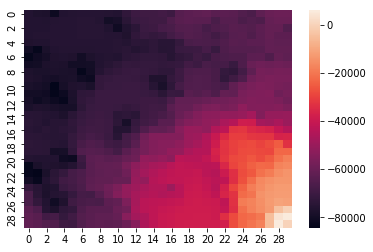

In [15]:
heatmap(Q.max(2))

# Lets look at the learning rate


c:\python35\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  after removing the cwd from sys.path.


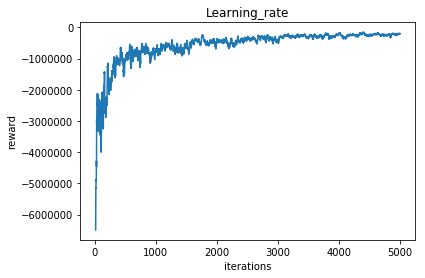

In [23]:
import pandas as pd
scores = np.array(scores)
itr = range(len(scores))
av_scores = pd.rolling_mean(scores,20)

plt.xlabel("iterations")
plt.ylabel("reward")
plt.title("Learning_rate")
plt.plot(itr, av_scores)
plt.show()

# Determine the policy

In [19]:
policy = Q.argmax(2)
policy

array([[2, 0, 1, 0, 2, 2, 1, 1, 0, 2, 0, 3, 2, 0, 2, 2, 3, 1, 3, 3, 2, 0,
        0, 3, 0, 0, 1, 3, 3, 0],
       [1, 2, 2, 1, 2, 3, 1, 1, 2, 0, 3, 3, 3, 2, 0, 0, 1, 1, 3, 3, 0, 2,
        3, 1, 3, 1, 1, 1, 3, 1],
       [0, 0, 1, 2, 2, 2, 3, 1, 2, 1, 2, 1, 3, 1, 2, 3, 1, 3, 2, 1, 3, 3,
        1, 2, 3, 3, 3, 2, 2, 3],
       [3, 3, 0, 2, 1, 2, 2, 3, 2, 2, 3, 1, 1, 3, 0, 3, 2, 3, 1, 3, 1, 2,
        1, 1, 3, 1, 3, 3, 3, 2],
       [0, 3, 0, 0, 1, 2, 0, 0, 3, 1, 1, 1, 0, 1, 3, 0, 2, 2, 0, 3, 2, 0,
        3, 1, 1, 1, 1, 0, 1, 2],
       [3, 2, 0, 3, 3, 2, 1, 0, 1, 2, 2, 1, 3, 3, 2, 0, 3, 1, 2, 1, 3, 1,
        0, 1, 3, 0, 0, 3, 1, 3],
       [3, 2, 3, 2, 0, 3, 3, 2, 1, 2, 2, 3, 3, 2, 0, 2, 3, 2, 3, 2, 2, 1,
        2, 2, 1, 2, 2, 3, 1, 1],
       [2, 0, 0, 3, 3, 2, 0, 2, 2, 2, 3, 0, 0, 2, 3, 2, 1, 1, 2, 0, 1, 0,
        3, 3, 0, 3, 3, 2, 1, 0],
       [0, 2, 1, 2, 1, 2, 1, 0, 0, 2, 3, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3,
        1, 1, 1, 1, 1, 0, 2, 0],
       [1, 3, 0, 0, 2, 3, 1, 2, 3, 3,

# Test the policy

In [17]:
#test policy
start_state = (0,0)
end_state= (n-1,n-1)
current_state = (0,0)

while current_state != end_state:
    action = policy[current_state[0], current_state[1]]
    actual_next_action, next_state = step(current_state, action)
    print("current_state", current_state, "action", actions[action], "actual_action", actions[actual_next_action])
    current_state = next_state

current_state (0, 0) action down actual_action right
current_state (0, 1) action up actual_action down
current_state (1, 1) action down actual_action up
current_state (0, 1) action up actual_action left
current_state (0, 0) action down actual_action down
current_state (1, 0) action right actual_action up
current_state (0, 0) action down actual_action right
current_state (0, 1) action up actual_action down
current_state (1, 1) action down actual_action down
current_state (2, 1) action up actual_action down
current_state (3, 1) action left actual_action right
current_state (3, 2) action up actual_action right
current_state (3, 3) action down actual_action right
current_state (3, 4) action right actual_action left
current_state (3, 3) action down actual_action up
current_state (2, 3) action down actual_action right
current_state (2, 4) action down actual_action down
current_state (3, 4) action right actual_action right
current_state (3, 5) action down actual_action left
current_state (3, 

current_state (5, 6) action right actual_action up
current_state (4, 6) action up actual_action up
current_state (3, 6) action down actual_action up
current_state (2, 6) action left actual_action left
current_state (2, 5) action down actual_action right
current_state (2, 6) action left actual_action right
current_state (2, 7) action right actual_action down
current_state (3, 7) action left actual_action right
current_state (3, 8) action down actual_action down
current_state (4, 8) action left actual_action right
current_state (4, 9) action right actual_action left
current_state (4, 8) action left actual_action right
current_state (4, 9) action right actual_action right
current_state (4, 10) action right actual_action down
current_state (5, 10) action down actual_action right
current_state (5, 11) action right actual_action up
current_state (4, 11) action right actual_action up
current_state (3, 11) action right actual_action up
current_state (2, 11) action right actual_action left
curr

current_state (11, 9) action down actual_action right
current_state (11, 10) action up actual_action left
current_state (11, 9) action down actual_action down
current_state (12, 9) action up actual_action up
current_state (11, 9) action down actual_action left
current_state (11, 8) action left actual_action down
current_state (12, 8) action up actual_action right
current_state (12, 9) action up actual_action right
current_state (12, 10) action up actual_action left
current_state (12, 9) action up actual_action up
current_state (11, 9) action down actual_action right
current_state (11, 10) action up actual_action right
current_state (11, 11) action up actual_action up
current_state (10, 11) action right actual_action left
current_state (10, 10) action left actual_action left
current_state (10, 9) action left actual_action up
current_state (9, 9) action left actual_action right
current_state (9, 10) action left actual_action right
current_state (9, 11) action right actual_action right
cu

current_state (10, 15) action left actual_action down
current_state (11, 15) action right actual_action left
current_state (11, 14) action down actual_action left
current_state (11, 13) action down actual_action right
current_state (11, 14) action down actual_action left
current_state (11, 13) action down actual_action down
current_state (12, 13) action down actual_action down
current_state (13, 13) action left actual_action left
current_state (13, 12) action up actual_action right
current_state (13, 13) action left actual_action right
current_state (13, 14) action down actual_action down
current_state (14, 14) action left actual_action left
current_state (14, 13) action right actual_action up
current_state (13, 13) action left actual_action down
current_state (14, 13) action right actual_action up
current_state (13, 13) action left actual_action right
current_state (13, 14) action down actual_action left
current_state (13, 13) action left actual_action right
current_state (13, 14) act

In [18]:
from scipy.io import savemat

policy=policy+1
mdict={'policy':policy}
savemat("VivekSah4b2.mat", mdict)





In [25]:
mdict2={'Q':Q, 'rewards':scores}
savemat("VivekSah4b2_q_scores.mat", mdict2)